# FRSign - French Railway Signalling Dataset

### Abstract

In the realm of autonomous transportation, there have been many initiatives for open-sourcing self-driving cars datasets, but much less for alternative methods of transportation such as trains. 

In this paper, we aim to bridge the gap by introducing **FRSign, a large-scale and accurate dataset for vision-based railway traffic light detection and recognition**. 

Our recordings were made on selected running trains in France and benefited from carefully hand-labeled annotations. 

An illustrative dataset which corresponds to ten percent of the acquired data to date is published in open source with the paper. It contains **more than 100,000 images illustrating six types of French railway traffic lights and their possible color combinations**, together with the relevant information regarding their acquisition such as date, time, sensor parameters, and bounding boxes. This dataset is published in open-source at the address [frsign.irt-systemx.fr](frsign.irt-systemx.fr).

We compare, analyze various properties of the dataset and provide metrics to express its variability. We also discuss specific challenges and particularities related to autonomous trains in comparison to autonomous cars.


### License

This work was made possible thanks to IRT SystemX, SNCF, and Alstom.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

### 1. Read HDF5 file content

The dataset FRSign contains two types of files:
* An HDF5 file called "frsign\_v1.0.h5": this file lists all the images contained in the dataset with their corresponding metadata. The structure of the HDF5 file is explained hereafter.
* Image files: all the images have been saved in PNG format. Their descriptions can be found in the HDF5 file.

Let's read the HDF5 store using pandas.

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/MLforphysicist'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# HDF5 file path
store_path = "{}/data/frsign_v1.0.h5".format(root_path)

# Read dataframes stored in HDF5 file
store = pd.HDFStore(store_path, mode='r')
df = store.select('dataframe')
im_df = store.select('images')

### 2. Understand the data

The HDF5 file "frsign\_v1.0.h5" contains two dataframes named: 
* `/dataframe`: dataframe which contains the metadata related to all video sequences. 
* `/images`: dataframe with a double index that lists images according to their chronological order in a sequence as well as their corresponding bounding boxes. 

Hereafter is the description of the columns found in `/dataframe`:

* `camera`: Identifier of the camera that was used.
* `CameraInfo_bayerTileFormat`: Bayer tile format.
* `CameraInfo_sensorResolution`: Sensor resolution (`width` x `height`).
* `context`: Context of the recording (train in our case).
* `datetime`: Date and timestamp of the recording.
* `fps`: Frame per second.
* `image_format`: Image format (PNG).
* `on_track`: Boolean that indicates whether the railway panel is on the same track as the train.
* `optic`: Selected optic for the acquisition.
* `sensor_id`: Unique sensor identifier.
* `sensor_type`: Type of sensor that was used (camera in our case).
* `state`: State of the railway panel.
* `type`: Type of the railway panel.    
* `video_name`: Name of the video file.
* `video`: Video filepath. 

The index of `/dataframe` creates a unique identifier for each video sequence found in the table.

In [5]:
df

,CameraInfo_bayerTileFormat,CameraInfo_sensorResolution,context,datetime,fps,sensor_id,sensor_type,state,type,on_track,video,video_name,optic,image_format
sequence,,,,,,,,,,,,,,
83,RGGB,1920x1200,train,2018-10-11 15:59:43.700,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
124,RGGB,1920x1200,train,2018-10-11 16:10:28.650,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis C (5 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
128,RGGB,1920x1200,train,2018-10-11 16:11:28.150,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
129,RGGB,1920x1200,train,2018-10-11 16:11:37.000,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
164,RGGB,1920x1200,train,2018-10-11 16:24:12.850,20.0,camera_2,camera,Rappel 60 (2 feux jaunes clignotants verticaux),Chassis H (6 & 3 feux en S),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,RGGB,1920x1200,train,2018-01-25 16:24:46.750,20.0,camera_2,camera,Semaphore (1 feu rouge),Chassis A (3 feux verticaux),False,Database/acquisitions/20180125/20180125_160009...,RecFile_7_20180125_160010_pointgrey_flycapture...,25,PNG8
4132,RGGB,1920x1200,train,2018-01-25 17:26:08.100,20.0,camera_2,camera,Semaphore (1 feu rouge),Chassis A (3 feux verticaux),False,Database/acquisitions/20180125/20180125_165335...,RecFile_7_20180125_165338_pointgrey_flycapture...,25,PNG8
3887,GBRG,2048x1536,train,2018-01-25 17:02:13.500,20.0,camera_1,camera,Semaphore (1 feu rouge),Chassis H (6 & 3 feux en S),True,Database/acquisitions/20180125/20180125_165335...,RecFile_7_20180125_165220_pointgrey_flycapture...,12,PNG8


In [6]:
len(df)

393

In [7]:
print(df["video_name"].iloc[0])
print()
print(df.iloc[0])

RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image.avi

CameraInfo_bayerTileFormat                                                  RGGB
CameraInfo_sensorResolution                                            1920x1200
context                                                                    train
datetime                                              2018-10-11 15:59:43.700000
fps                                                                           20
sensor_id                                                               camera_2
sensor_type                                                               camera
state                              Feu rouge clignotant (1 feu rouge clignotant)
type                                                Chassis A (3 feux verticaux)
on_track                                                                    True
video                          Database/acquisitions/20181011/20181011_153137...
video_name                     RecFile_1_201

In [8]:
print(df["video_name"].iloc[1])
print()
print(df.iloc[1])

RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image.avi

CameraInfo_bayerTileFormat                                                  RGGB
CameraInfo_sensorResolution                                            1920x1200
context                                                                    train
datetime                                              2018-10-11 16:10:28.650000
fps                                                                           20
sensor_id                                                               camera_2
sensor_type                                                               camera
state                              Feu rouge clignotant (1 feu rouge clignotant)
type                                                Chassis C (5 feux verticaux)
on_track                                                                    True
video                          Database/acquisitions/20181011/20181011_153137...
video_name                     RecFile_1_201

In [9]:
np.sum(df["video_name"] == "RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image.avi")

9

In [10]:
len(df["video_name"].unique())

42

Hereafter is the description of the columns found in  `/images`:

* `fullpath`: Image filepath.
* `x` : Abscissa of the upper left corner of the bounding box.
* `y` : Ordinate of the upper left corner of the bounding box.
* `w` : Width of the bounding box. 
* `h` : Height of the bounding box. 

The double index of `/images` serves to, first, identify the video sequence that contains the image, and second, create a unique identifier for the image.

In [11]:
im_df

fullpath    x  ...   w    h
sequence image                                                          ...         
83       0      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15   21
         1      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15   21
         2      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15   21
         3      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15   21
         4      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15   21
...                                                           ...  ...  ...  ..  ...
1149     677    RecFile_1_20190124_135313_pointgrey_flycapture...  583  ...  75  177
         678    RecFile_1_20190124_135313_pointgrey_flycapture...  583  ...  75  177
         679    RecFile_1_20190124_135313_pointgrey_flycapture...  583  ...  75  177
         680    RecFile_1_20190124_135313_pointgrey_flycapture...  583  ...  75  177
         681    RecFile_1_20190124_135313_pointgrey_flycapture...  583  ...  75  177

[105352 rows x 5 columns]

In [12]:
print(im_df["fullpath"].iloc[0])
print(type(im_df["fullpath"].iloc[0]))
print()
print(im_df.iloc[0])

RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image/33734_rgb.png
<class 'str'>

fullpath    RecFile_1_20181011_153137_pointgrey_flycapture...
x                                                         882
y                                                         528
w                                                          15
h                                                          21
Name: (83, 0), dtype: object


In [13]:
print(im_df["fullpath"].iloc[1])
print()
print(im_df.iloc[1])

RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image/33735_rgb.png

fullpath    RecFile_1_20181011_153137_pointgrey_flycapture...
x                                                         882
y                                                         528
w                                                          15
h                                                          21
Name: (83, 1), dtype: object


In [14]:
print(im_df["fullpath"].iloc[100000])
print()
print(im_df.iloc[100000])

RecFile_1_20181115_092825_pointgrey_flycapture2_1_ipl_image/24698_rgb.png

fullpath    RecFile_1_20181115_092825_pointgrey_flycapture...
x                                                         703
y                                                         850
w                                                          40
h                                                          72
Name: (281, 90), dtype: object


In [15]:
print(im_df.loc[83, :])

                                                fullpath    x    y   w   h
image                                                                     
0      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528  15  21
1      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528  15  21
2      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528  15  21
3      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528  15  21
4      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528  15  21
...                                                  ...  ...  ...  ..  ..
207    RecFile_1_20181011_153137_pointgrey_flycapture...  857  470  22  39
208    RecFile_1_20181011_153137_pointgrey_flycapture...  857  470  22  39
209    RecFile_1_20181011_153137_pointgrey_flycapture...  857  469  22  39
210    RecFile_1_20181011_153137_pointgrey_flycapture...  857  469  22  39
211    RecFile_1_20181011_153137_pointgrey_flycapture...  856  468  22  39

[212 rows x 5 columns]


In [16]:
print(im_df.head(213))

                                                         fullpath    x  ...   w   h
sequence image                                                          ...        
83       0      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15  21
         1      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15  21
         2      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15  21
         3      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15  21
         4      RecFile_1_20181011_153137_pointgrey_flycapture...  882  ...  15  21
...                                                           ...  ...  ...  ..  ..
         208    RecFile_1_20181011_153137_pointgrey_flycapture...  857  ...  22  39
         209    RecFile_1_20181011_153137_pointgrey_flycapture...  857  ...  22  39
         210    RecFile_1_20181011_153137_pointgrey_flycapture...  857  ...  22  39
         211    RecFile_1_20181011_153137_pointgrey_flycapture...  856  ... 

In [17]:
len(im_df)

105352

### 3. Display the bounding box over an image

In [18]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

In [19]:
# Image folder path
img_folder_path = "/data/images/"

# Randomly chosen image for illustrative purposes
img_index = (83, 200)

# Read the sequence's metadata from "/dataframe"
row = df.loc[img_index[0]]

# Read the image's metadata from "/images"
img_row = im_df.loc[img_index]

gdrive/My Drive/MLforphysicist/data/images/RecFile_1_20181011_153137_pointgrey_flycapture2_1_ipl_image/33934_rgb.png

860
474
22
39
gdrive/My Drive/MLforphysicist/test.png


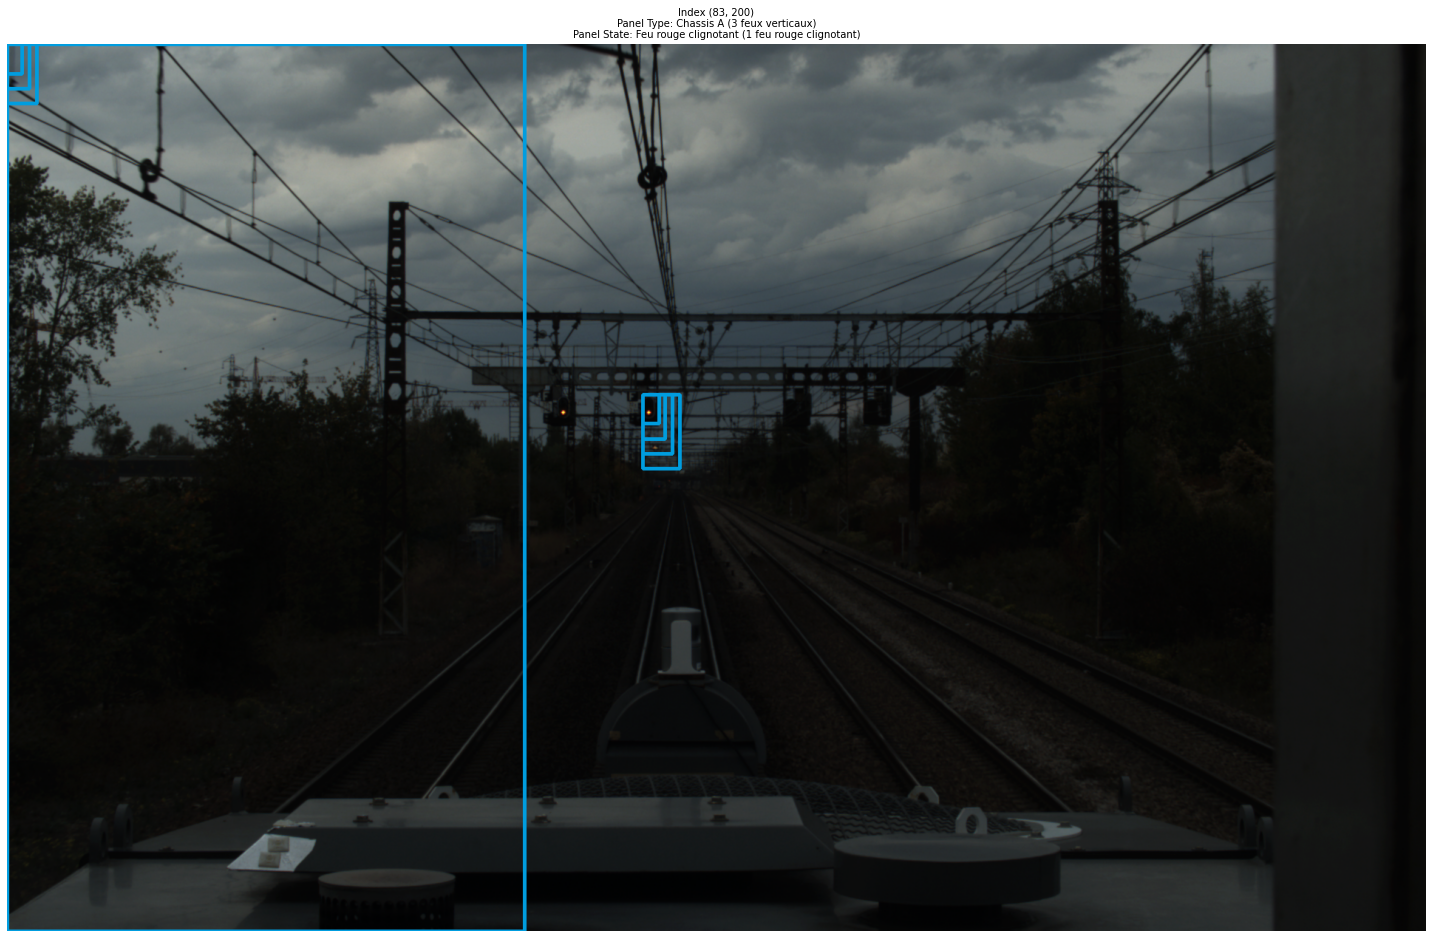

In [20]:
img_fullpath = root_path + img_folder_path + img_row.fullpath
print(img_fullpath)
print()

# Read image using OpenCV
img = cv2.imread(img_fullpath, -1)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add bounding box to image
bounding_box_color = (0,157,223)
bounding_box_width = 3

print(img_row.x)
print(img_row.y)
print(img_row.w)
print(img_row.h)

cv2.rectangle(img_color, 
              (img_row.x, img_row.y), (img_row.x + img_row.w, img_row.y + img_row.h), 
              bounding_box_color, 
              bounding_box_width)

# find centre
cv2.rectangle(img_color, 
              (0, 0), (20, 40), 
              bounding_box_color, 
              bounding_box_width)

cv2.rectangle(img_color, 
              (0, 0), (30, 60), 
              bounding_box_color, 
              bounding_box_width)

cv2.rectangle(img_color, 
              (0, 0), (40, 80), 
              bounding_box_color, 
              bounding_box_width)

# cut for 1200x 1200 format
cv2.rectangle(img_color, 
              (0, 0), (700, 1200), 
              bounding_box_color, 
              bounding_box_width)

# test for panel size
cv2.rectangle(img_color, 
              (img_row.x, img_row.y), (img_row.x + 50, img_row.y + 100), 
              bounding_box_color, 
              bounding_box_width)

cv2.rectangle(img_color, 
              (img_row.x, img_row.y), (img_row.x + 40, img_row.y + 80), 
              bounding_box_color, 
              bounding_box_width)

cv2.rectangle(img_color, 
              (img_row.x, img_row.y), (img_row.x + 30, img_row.y + 60), 
              bounding_box_color, 
              bounding_box_width)


# Get panel type and state to create the image title
panel_type = row.type
panel_state = row.state

plt.figure(figsize=(20, 20))
plt.title("Index " + str(img_index) + "\nPanel Type: " + panel_type + "\nPanel State: " + panel_state, {"fontsize": 10})
plt.axis('off')
plt.tight_layout()

# Show image
plt.imshow(img_color)
plt.savefig("{}/test.png".format(root_path))
print("{}/test.png".format(root_path))

### 4. Studies of boundary boxes

In [21]:
print(im_df["x"].loc[83, :])
print(im_df["x"].values)
print(type(im_df["x"].values))
print(len(im_df["x"].values))

image
0      882
1      882
2      882
3      882
4      882
      ... 
207    857
208    857
209    857
210    857
211    856
Name: x, Length: 212, dtype: int64
[882 882 882 ... 583 583 583]
<class 'numpy.ndarray'>
105352


max:  2036
min:  -667


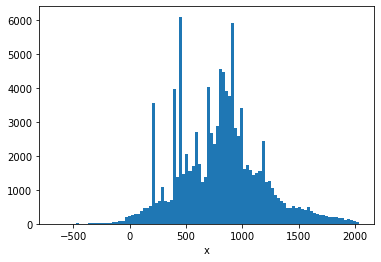

In [22]:
test = plt.hist(im_df["x"].values, bins=100)
plt.xlabel("x")
print("max: ", np.max(im_df["x"].values))
print("min: ", np.min(im_df["x"].values))

max:  1274
min:  -455


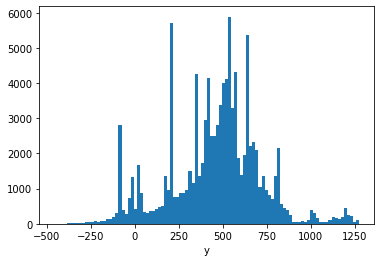

In [23]:
test = plt.hist(im_df["y"].values, bins=100)
plt.xlabel("y")
print("max: ", np.max(im_df["y"].values))
print("min: ", np.min(im_df["y"].values))

In [24]:
print(im_df[im_df["x"] < -200 ])
#print(im_df["x"][im_df["x"] < -200 ])
#print(im_df["y"][im_df["x"] < -200 ])
#print(im_df["w"][im_df["x"] < -200 ])
#print(im_df["h"][im_df["x"] < -200 ])

                                                         fullpath  ...    h
sequence image                                                     ...     
609      478    RecFile_1_20190124_101053_pointgrey_flycapture...  ...  626
         479    RecFile_1_20190124_101053_pointgrey_flycapture...  ...  635
         480    RecFile_1_20190124_101053_pointgrey_flycapture...  ...  627
         481    RecFile_1_20190124_101053_pointgrey_flycapture...  ...  707
         482    RecFile_1_20190124_101053_pointgrey_flycapture...  ...  754
...                                                           ...  ...  ...
3933     605    RecFile_7_20180125_165220_pointgrey_flycapture...  ...  959
         606    RecFile_7_20180125_165220_pointgrey_flycapture...  ...  959
         607    RecFile_7_20180125_165220_pointgrey_flycapture...  ...  959
         608    RecFile_7_20180125_165220_pointgrey_flycapture...  ...  959
3883     23     RecFile_7_20180125_165220_pointgrey_flycapture...  ...  418

[162 rows x

max:  833
min:  11


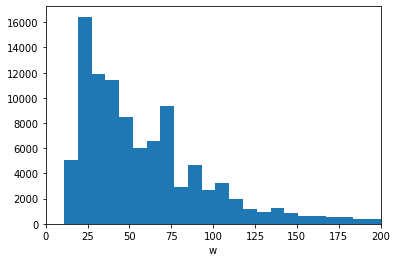

In [25]:
test = plt.hist(im_df["w"].values, bins=100)
plt.xlabel("w")
plt.xlim(0, 200)
print("max: ", np.max(im_df["w"].values))
print("min: ", np.min(im_df["w"].values))

max:  1327
min:  10


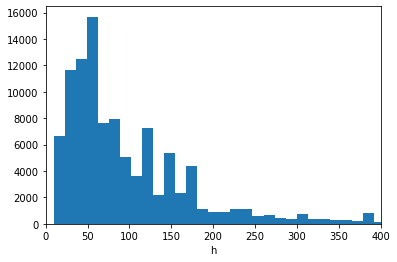

In [26]:
test = plt.hist(im_df["h"].values, bins=100)
plt.xlabel("h")
plt.xlim(0, 400)
print("max: ", np.max(im_df["h"].values))
print("min: ", np.min(im_df["h"].values))


In [27]:
im_df[im_df["fullpath"] == "RecFile_1_20190124_112608_pointgrey_flycapture2_1_ipl_image/20029_rgb.png" ]

,,fullpath,x,y,w,h
sequence,image,,,,,
806,369,RecFile_1_20190124_112608_pointgrey_flycapture...,-8,921,415,599


In [28]:
print("max h: ", np.max(im_df["h"].values))
print("min h: ", np.min(im_df["h"].values))
print("max w: ", np.max(im_df["w"].values))
print("min w: ", np.min(im_df["w"].values))
print("max x: ", np.max(im_df["x"].values))
print("min x: ", np.min(im_df["x"].values))
print("max y: ", np.max(im_df["y"].values))
print("min y: ", np.min(im_df["y"].values))

max h:  1327
min h:  10
max w:  833
min w:  11
max x:  2036
min x:  -667
max y:  1274
min y:  -455


In [29]:
# 50 Weite 100 Höhe sind etwas mehr als die Hälfte der Daten
# 50/1920 = 0.026 Anteil an Weite, 100/1200 = 0.083 Anteil an Höhe
# 50/2048 = 0.024 Anteil an Weite, 100/1536 = 0.065 Anteil an Höhe

Text(0.5, 0, 'CameraInfo_sensorResolution')

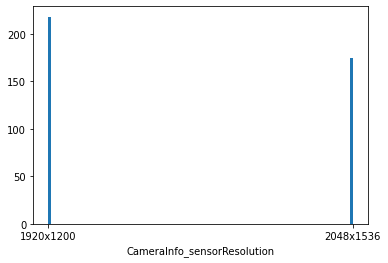

In [30]:
test = plt.hist(df["CameraInfo_sensorResolution"].values, bins=100) 
plt.xlabel("CameraInfo_sensorResolution")

In [31]:
print(df["type"].unique())

['Chassis A (3 feux verticaux)' 'Chassis C (5 feux verticaux)'
 'Chassis H (6 & 3 feux en S)' 'Chassis F (6 & 1 feux en L inverse)'
 'Chassis R (6 feux dans un disque)' 'Chassis ID3 (3 feux horizontaux)'
 'Chassis ID2 (2 feux horizontaux)']


In [32]:
print(df["on_track"].unique())
print(np.sum(df["on_track"].values))
print(len(df["on_track"].values))
df["on_track"]

[ True False]
235
393


sequence
83       True
124      True
128      True
129      True
164      True
        ...  
3829    False
4132    False
3887     True
2208    False
1149     True
Name: on_track, Length: 393, dtype: bool

In [33]:
# Close store
store.close()